In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("AmesHousing.csv")

In [3]:
! pip install scikit-learn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [5]:
print(df.shape)

(2930, 82)


In [6]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

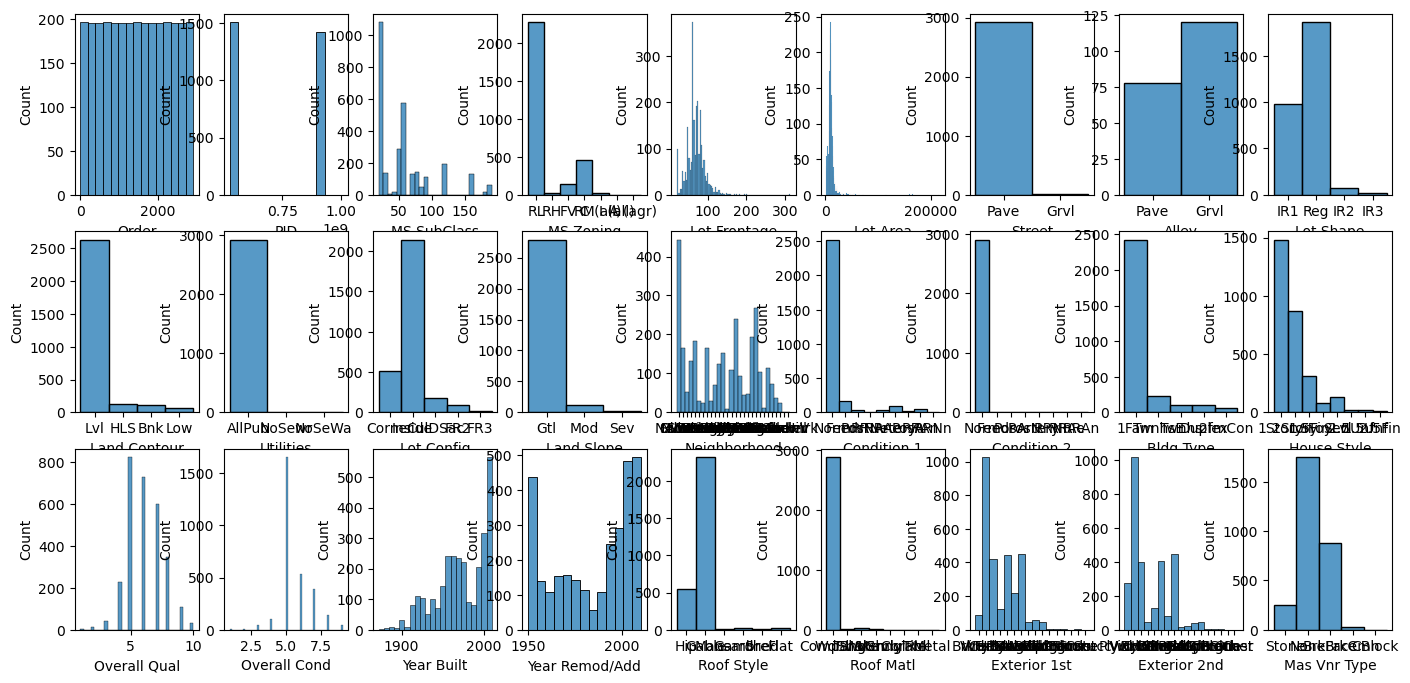

In [10]:
rows=3 
cols=9
fig, ax= plt.subplots(nrows=rows,ncols=cols, figsize=(17,8))
col=df.columns
index=0
for i in range(rows):
   for j in range(cols):
    sns.histplot(df[col[index]],ax = ax[i][j])
    index= index + 1
    plt.tight_layout

In [11]:
corrmat=df.corr()
corrmat

C:\Users\hp\AppData\Local\Temp\ipykernel_7068\1846019215.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


<Axes: >

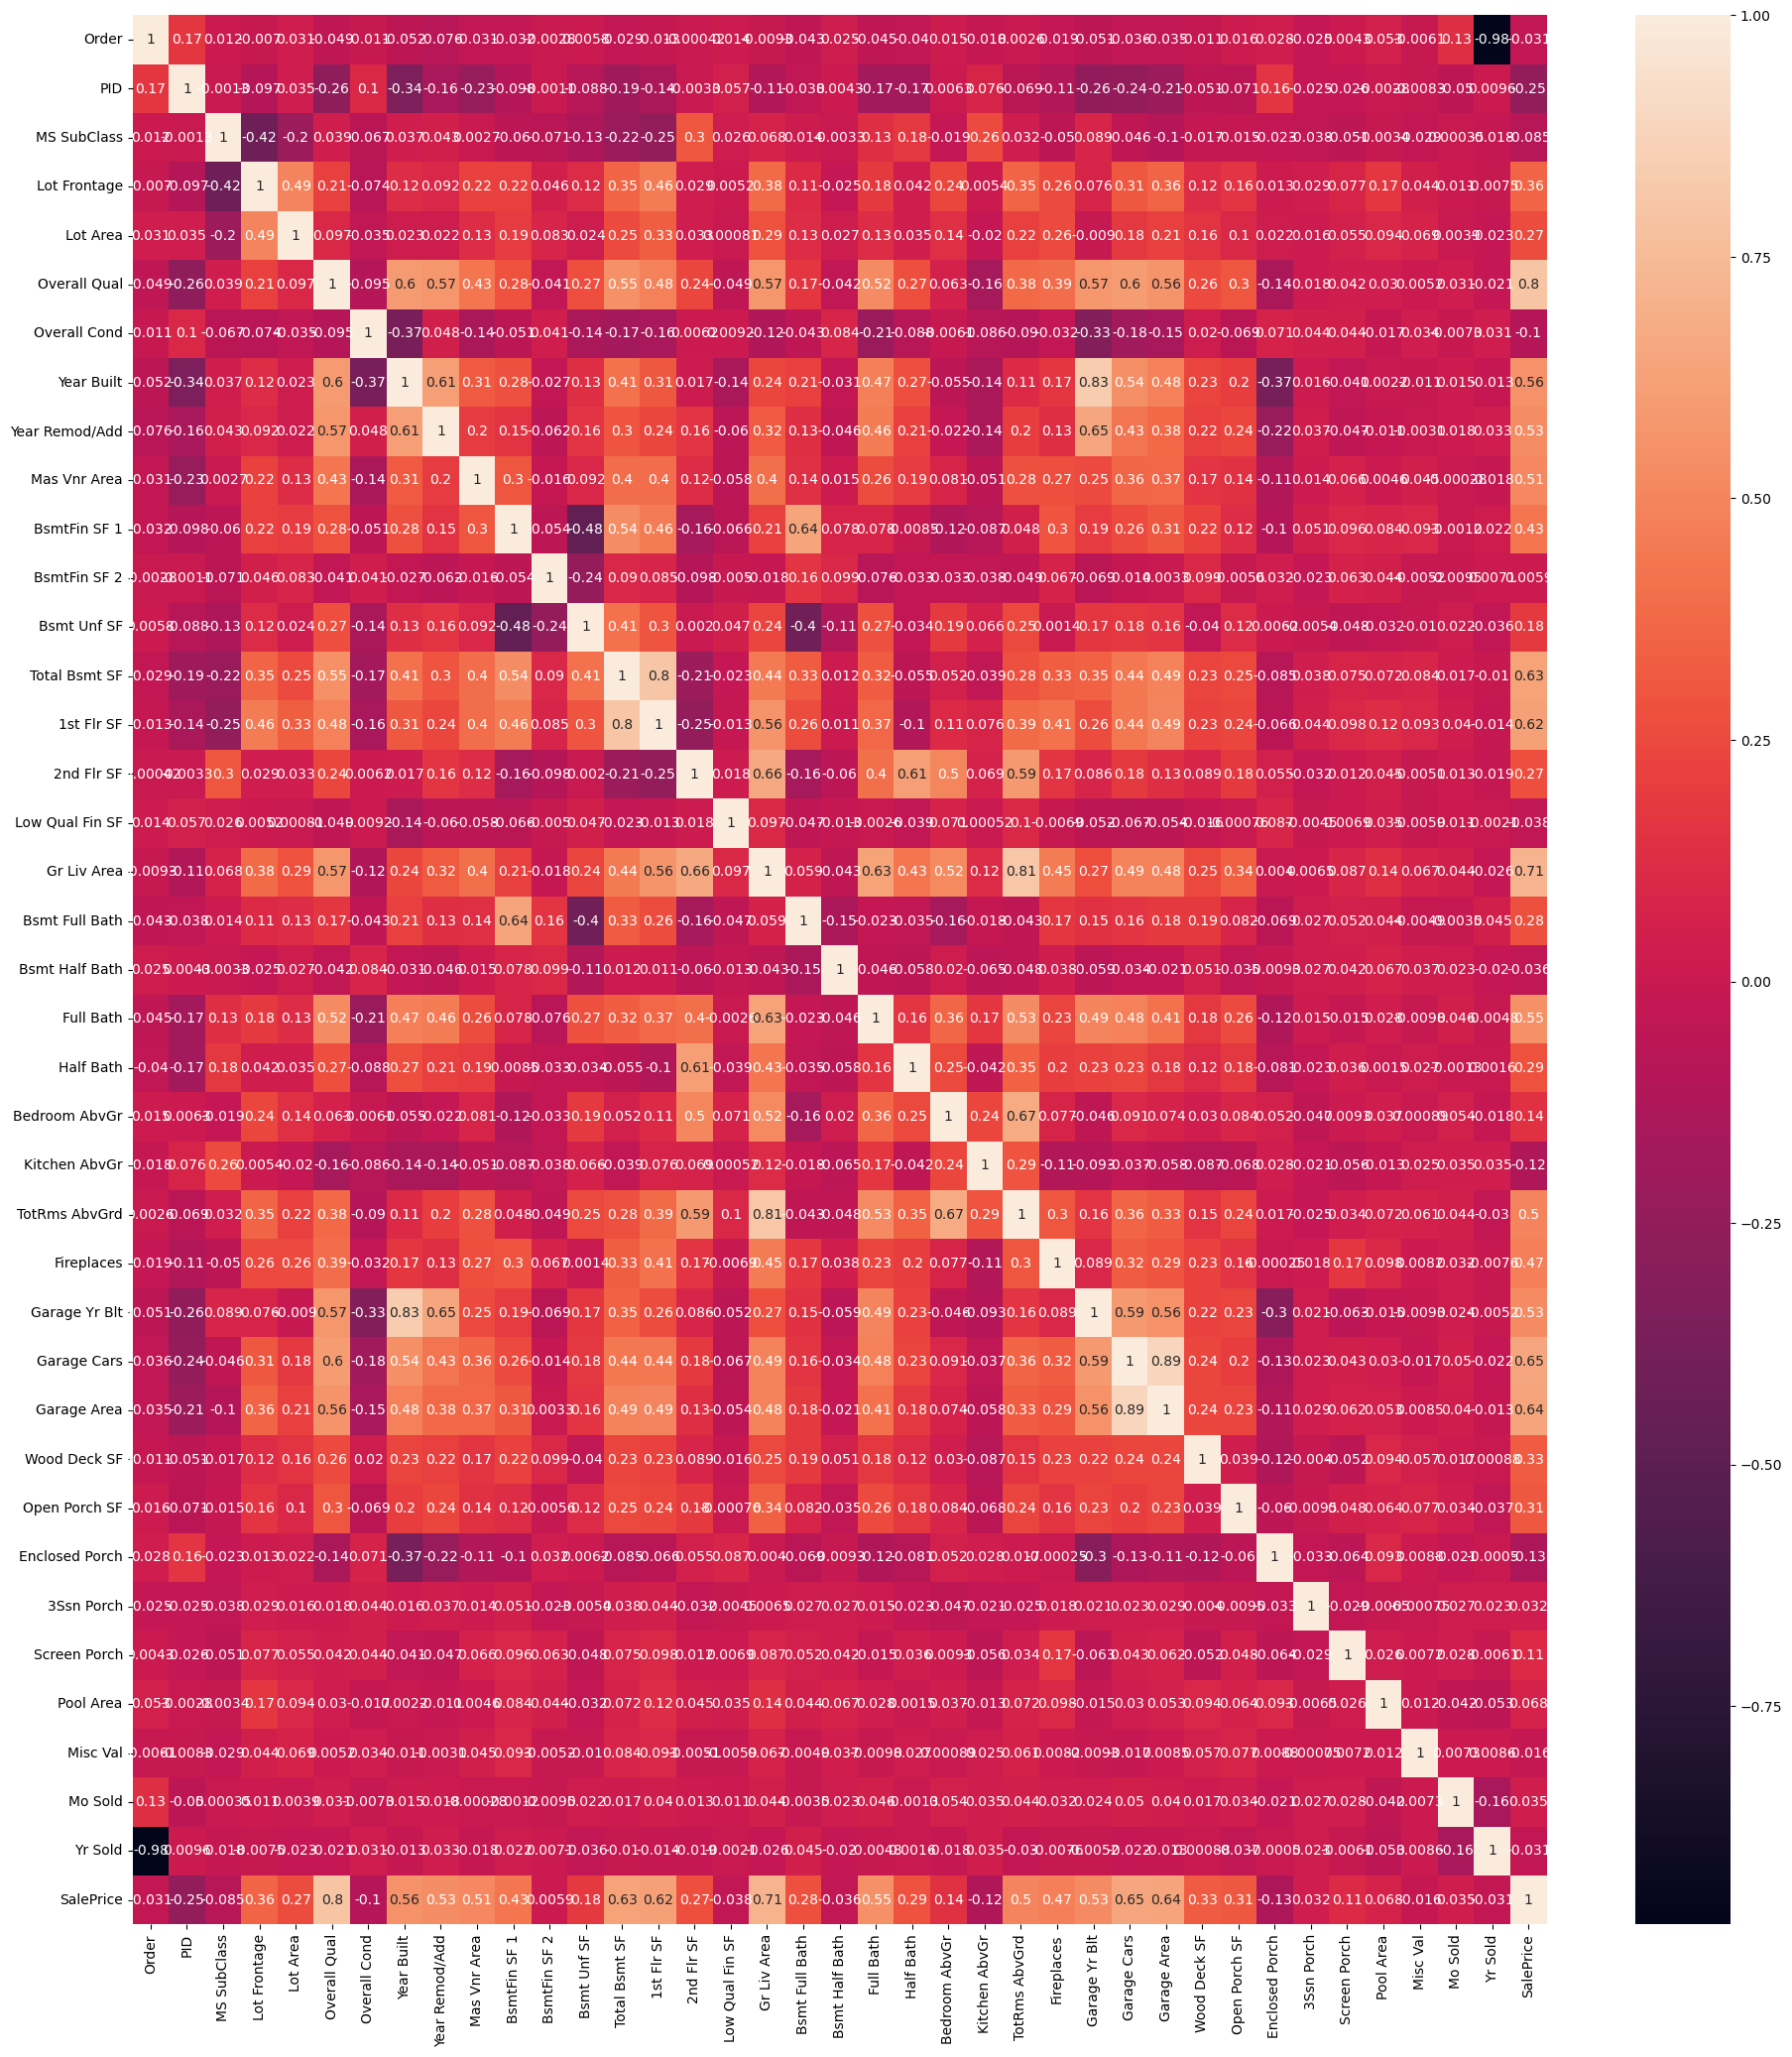

In [12]:
fig, ax=plt.subplots (figsize = (23,25))
sns.heatmap(corrmat, annot=True, annot_kws={'size':10})

In [13]:
def GotCorrelatedFeatures(corrdf,threshold):
    feature=[]
    value=[]
    for i, index in enumerate(corrdf.index):
        if abs(corrdf[index])>threshold:
            feature.append(index)
            value.append(corrdf[index])
    df=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [14]:
corrmat.index

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [15]:
threshold=0.50
corr_value=GotCorrelatedFeatures(corrmat['SalePrice'],threshold)
corr_value

,Corr Value
Overall Qual,0.799262
Year Built,0.558426
Year Remod/Add,0.532974
Mas Vnr Area,0.508285
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Gr Liv Area,0.706780
Full Bath,0.545604
Garage Yr Blt,0.526965
Garage Cars,0.647877


In [16]:
corr_value.index.values

array(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype=object)

In [17]:
correlated_data=df[corr_value.index]
correlated_data.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
0,6,1960,1960,112.0,1080.0,1656,1656,1,1960.0,2.0,528.0,215000
1,5,1961,1961,0.0,882.0,896,896,1,1961.0,1.0,730.0,105000
2,6,1958,1958,108.0,1329.0,1329,1329,1,1958.0,1.0,312.0,172000
3,7,1968,1968,0.0,2110.0,2110,2110,2,1968.0,2.0,522.0,244000
4,5,1997,1998,0.0,928.0,928,1629,2,1997.0,2.0,482.0,189900


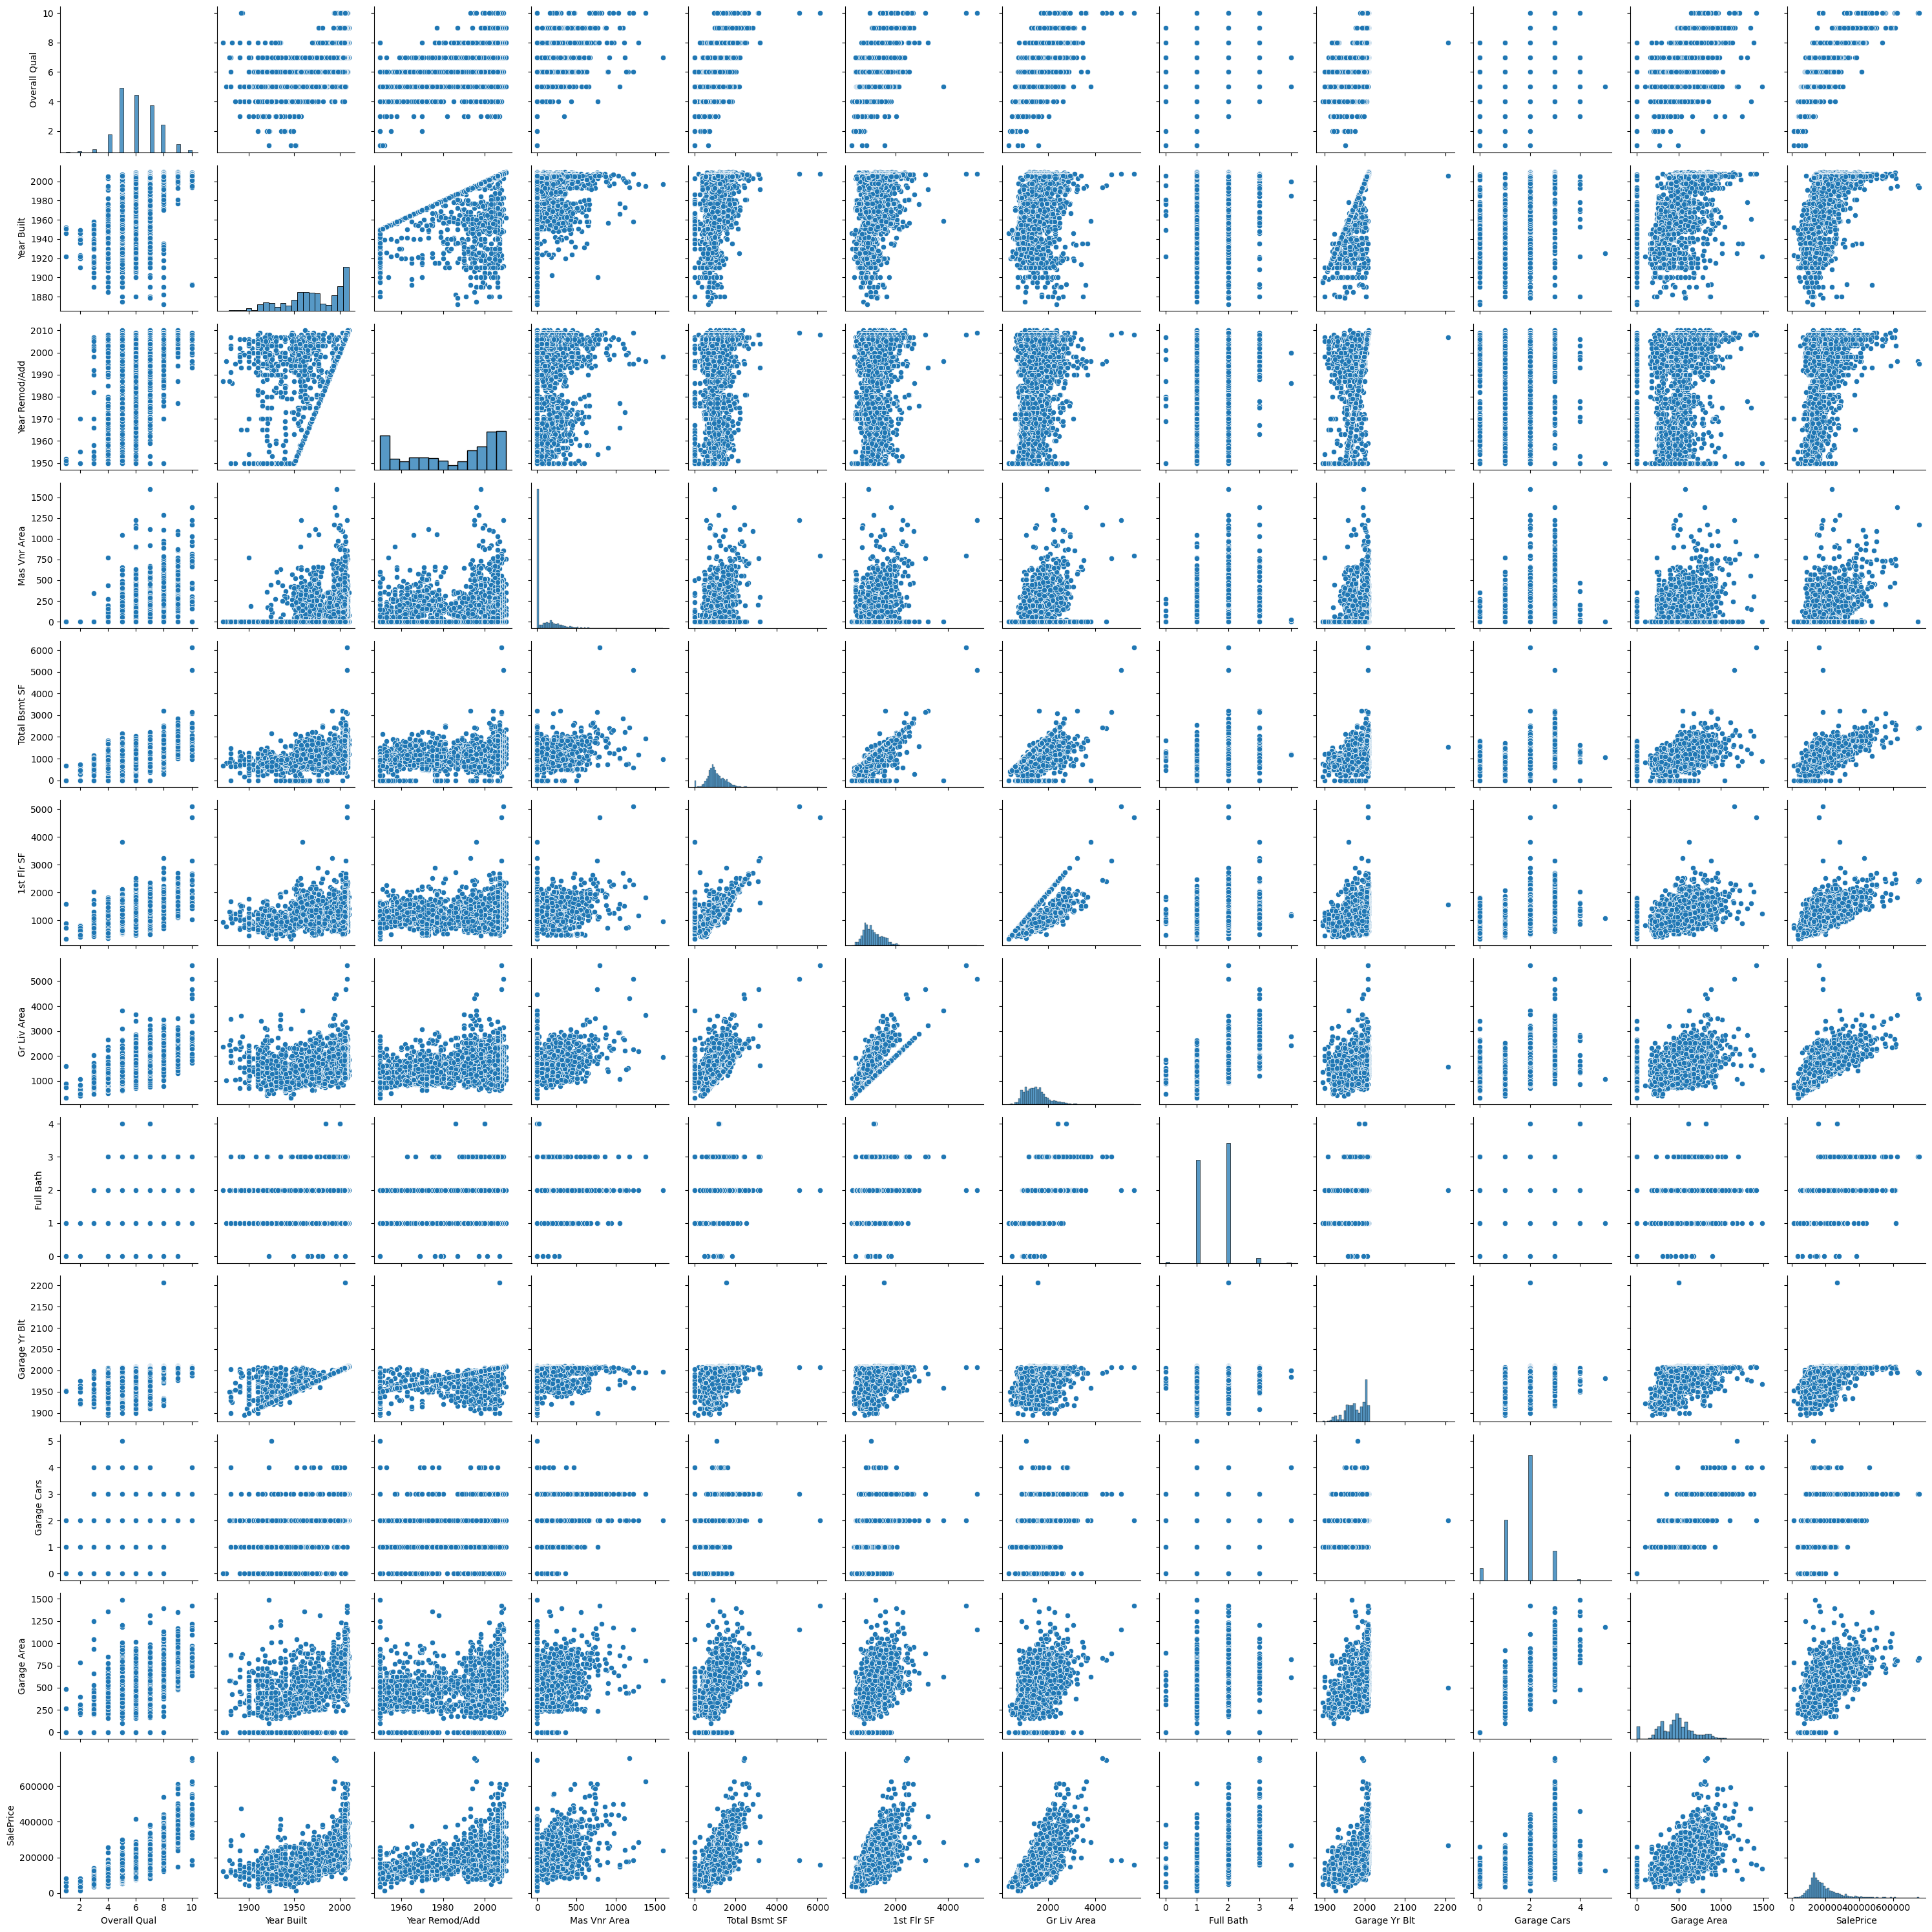

In [18]:
sns.pairplot(correlated_data)
plt.tight_layout()

In [19]:
X=correlated_data.drop(columns=['SalePrice'],axis=1)

In [20]:
correlated_data=df[corr_value.index]
correlated_data.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
0,6,1960,1960,112.0,1080.0,1656,1656,1,1960.0,2.0,528.0,215000
1,5,1961,1961,0.0,882.0,896,896,1,1961.0,1.0,730.0,105000
2,6,1958,1958,108.0,1329.0,1329,1329,1,1958.0,1.0,312.0,172000
3,7,1968,1968,0.0,2110.0,2110,2110,2,1968.0,2.0,522.0,244000
4,5,1997,1998,0.0,928.0,928,1629,2,1997.0,2.0,482.0,189900


In [21]:
X=correlated_data.drop(columns=['SalePrice'],axis=1)
y=correlated_data['SalePrice']
X.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area
0,6,1960,1960,112.0,1080.0,1656,1656,1,1960.0,2.0,528.0
1,5,1961,1961,0.0,882.0,896,896,1,1961.0,1.0,730.0
2,6,1958,1958,108.0,1329.0,1329,1329,1,1958.0,1.0,312.0
3,7,1968,1968,0.0,2110.0,2110,2110,2,1968.0,2.0,522.0
4,5,1997,1998,0.0,928.0,928,1629,2,1997.0,2.0,482.0


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X_train.shape,X_test.shape

((2344, 11), (586, 11))

In [24]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoostingRegressor()

In [25]:
#coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
from sklearn.inspection import permutation_importance
# Calculate permutation feature importances
result = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=0)

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'importance': result.importances_mean}, index=X_train.columns)

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Now, you have a DataFrame of feature importances
print(feature_importances)


                importance
Overall Qual      0.408607
Gr Liv Area       0.197313
Total Bsmt SF     0.062744
1st Flr SF        0.041887
Year Remod/Add    0.037786
Garage Area       0.024962
Year Built        0.022994
Garage Cars       0.018829
Mas Vnr Area      0.016233
Full Bath         0.015517
Garage Yr Blt     0.009273


In [56]:
y_predict=model.predict(X_test)

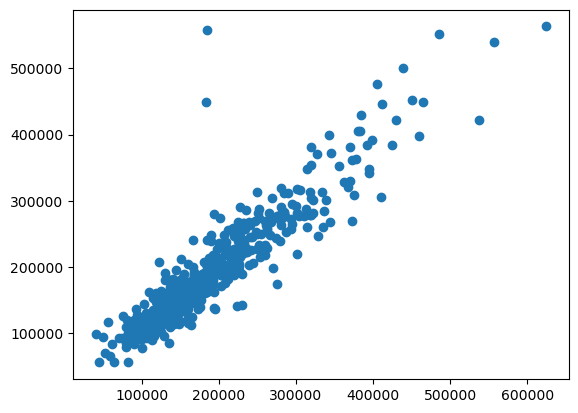

In [27]:
plt.scatter(y_test,y_predict)

C:\Users\hp\AppData\Local\Temp\ipykernel_7068\414477154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test,y_predict),bins=50)


<Axes: ylabel='Density'>

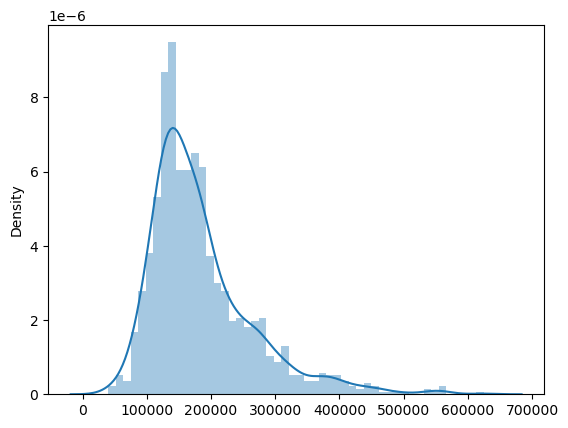

In [28]:
sns.distplot((y_test,y_predict),bins=50)

In [29]:
(y_predict-y_test).mean()

1826.5386075706888

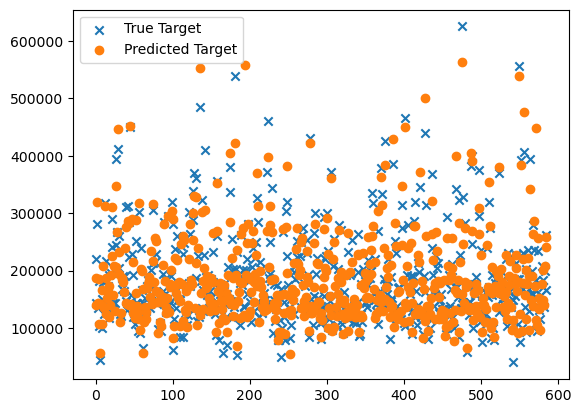

In [30]:
import matplotlib.pyplot as plt

# Assuming you have y_test and y_predict

plt.scatter(range(len(y_test)), y_test, marker='x', label='True Target')
plt.scatter(range(len(y_predict)), y_predict, label='Predicted Target')

plt.legend()
plt.show()



In [31]:
df=pd.DataFrame(data=[y_predict,y_test])
df.T

,0,1
0,187577.438790,220000.0
1,139938.004852,143000.0
2,319384.279809,281000.0
3,142927.293090,135000.0
4,107024.183898,102776.0
...,...,...
581,149488.198260,172000.0
582,139292.172602,136000.0
583,208338.749899,198500.0
584,240381.107901,167000.0


In [32]:
from sklearn.metrics import r2_score

In [33]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
mean=(y_predict-y_test).mean()
print('r2 score:' ,score)
print('mean_absolute_error:',mae)
print('mean_squared_error:',mse)
print('mean_:',mean)

r2 score: 0.8407167897491169
mean_absolute_error: 19704.08757599368
mean_squared_error: 1045725507.1911744
mean_: 1826.5386075706888


In [34]:
correlated_data.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype='object')

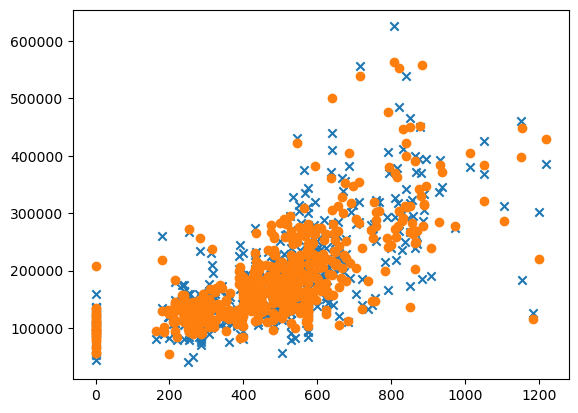

In [36]:
y_predict = model.predict(X_test)
plt.scatter(X_test['Garage Area'],y_test, marker='x')
plt.scatter(X_test['Garage Area'],y_predict)

plt.show()

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [88]:
X.shape, y.shape

((2930, 11), (2930,))

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
X_train.shape,X_test.shape

((2637, 11), (293, 11))

In [90]:
assert (X.shape [0] == y.shape[0])

In [93]:
assert (X_train.shape [0] == y_train.shape[0])
assert (X_test.shape [0] == y_test.shape[0])

In [103]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),  # Feature scaling step
     ('imputer', SimpleImputer(strategy='mean')), 
    ('knn', KNeighborsRegressor(n_neighbors=2))  # K-nearest neighbors step
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred, squared = False)
mean=(y_pred-y_test).mean()
print('r2 score:' ,score)
print('mean_absolute_error:',mae)
print('mean_squared_error:',mse)
print('mean_:',mean)

r2 score: 0.7101858523991935
mean_absolute_error: 24925.0409556314
mean_squared_error: 42568.55699181248
mean_: -2508.2935153583617


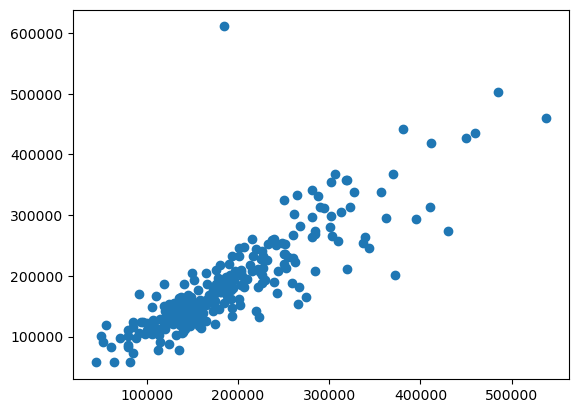

In [105]:
plt.scatter(y_test,y_pred)

In [82]:
knn= KNeighborsRegressor(20)

In [83]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

# Now, you can train your LinearRegression model on X_train_imputed
model = KNeighborsRegressor()
model.fit(X_train_imputed, y_train)



KNeighborsRegressor()

In [65]:
y_predict2=model2.predict(X_test)

In [66]:
score=r2_score(y_test,y_predict2)
mae=mean_absolute_error(y_test,y_predict2)
mse=mean_squared_error(y_test,y_predict2)
mean=(y_predict2-y_test).mean()
print('r2 score:' ,score)
print('mean_absolute_error:',mae)
print('mean_squared_error:',mse)
print('mean_:',mean)

r2 score: 0.8407167897491169
mean_absolute_error: 19704.08757599368
mean_squared_error: 1045725507.1911744
mean_: 1826.5386075706888


In [104]:
r2_score(y_test,y_pred)

0.7101858523991935

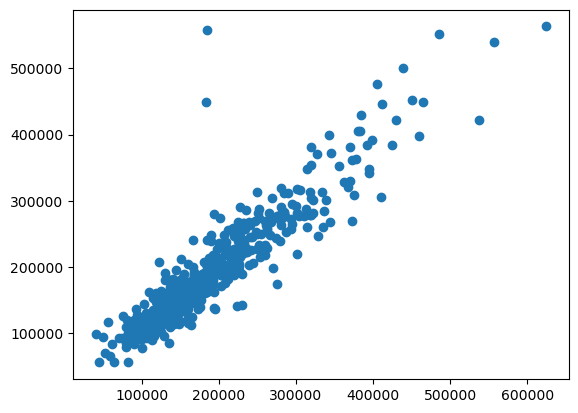

In [59]:
plt.scatter(y_test,y_predict2)